In [231]:
import numpy as np
import pandas as pd
from amp.data_utils.sequence import translate_peptide
from joblib import dump, load

# PLOTTING 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_style(
    'whitegrid', 
    {
        'grid.color': '.95',
        'axes.spines.right': False,
        'axes.spines.top': False,
    }
)

params = {
    'axes.labelsize': 6,
    'axes.titlesize':6,
    'font.size': 5, 
    'legend.fontsize': 5,
    'xtick.labelsize': 6, 
    'ytick.labelsize': 6,
}

plt.rcParams.update(params)

In [183]:
POS_COUNT = 1319
NEG_COUNT = 1253

In [204]:
palette_models = {  
    'HydrAMP τ=1': '#B80018',
    'HydrAMP τ=2': '#D91115',
    'HydrAMP τ=5': '#660708',         
    'PepCVAE': '#1d3557',
    'Basic': '#B4C5E4',
    'Joker': '#0F5257', #'##49416D',       
#     'AMP-LM': '#588B8B',
#     'Dean-VAE': '#DE6897',
#     'Muller-LSTM': '#73D2DE',
#     'AMP-GAN': '#FA9F42',    
}


TEMPS = {
    'HydrAMP': [1, 2, 5],
    'PepCVAE': [1],
    'Basic': [1],
}

# Improvement 

In [185]:
results = {}

In [186]:
# Read HydrAMP, PepCVAE, Basic
for model, temps in TEMPS.items():
    for temp in temps:
        for mode in ['improvement', 'discovery']:
            results[f'{model}_pos_{mode}_{temp}'] = load(f'../results/pos_dict_{mode}_{model}_{temp}.joblib')
            results[f'{model}_neg_{mode}_{temp}'] = load(f'../results/neg_dict_{mode}_{model}_{temp}.joblib')
 

In [187]:
# Read Joker 

results['joker_pos_discovery'] = pd.read_csv('../results/joker_pos_discovery.tsv', sep='\t' )
results['joker_pos_improvement'] = pd.read_csv('../results/joker_pos_improvement.tsv', sep='\t' )
results['joker_neg_discovery'] = pd.read_csv('../results/joker_neg_discovery.tsv', sep='\t' )
results['joker_neg_improvement'] = pd.read_csv('../results/joker_neg_improvement.tsv', sep='\t' )

In [188]:
joker

,Unnamed: 0,id,sequence_prototype,amp_prototype,mic_prototype,sequence_analogue,amp_analogue,mic_analogue
0,0,2,AAKIILNPKFRCKAAFC,0.993110,0.443872,KAKLKLIPKFACKAAFC,0.999710,0.999925
1,2,5,AAYLLAKINLKALAALAKKIL,0.999946,0.999972,KAYLKAIINLAALAALAKKIL,0.999959,0.999995
2,9,11,AFCWNVCVYRNGVRVCHRRCN,0.999654,0.995366,AKDWLKCVYRNAVRVIHRRCN,0.999517,0.999578
3,14,15,AIFIFIRWLLKLGHHGRAPP,0.085455,0.067441,AIKDFLKWLLKLAHHGIAPP,0.999747,0.994213
4,15,17,AKAVKPKTAKPKTAKPKTAKA,0.999168,0.000003,AKAVKDKLKKIKTAAPKTAKA,0.958697,0.999712
...,...,...,...,...,...,...,...,...
426,1670,1277,YHRLRRLLLIVTRIVELLGRR,0.999813,0.999145,YHRLKDLLKIVTRIAELLGRR,0.815485,0.999974
427,1672,1278,YIGLKDRKRPSELRRIASQVKYA,0.003908,0.000003,YKGLLKRIRPSALRRIASQVKYA,0.990488,0.992834
428,1673,1281,YIVYKIRSARKRRKALK,0.999655,0.069912,YKDYLKRIARKARKALK,0.999487,0.998472
429,1675,1282,YIVYKIRSAWKRWKAL,0.999907,0.200745,YKDYLKRIAWKAWKAL,0.991401,0.995285


# Plot

In [189]:
def get_prototypes_with_analogues(result_dict : dict):
    return ({prototype: analogues for prototype, analogues in result_dict.items() \
             if analogues['generated_sequences']})

def get_bars(
    results,
    model,
    temp,
):
    pos_discovery_dict = results[f'{model}_pos_discovery_{temp}']
    pos_improvement_dict =  results[f'{model}_pos_improvement_{temp}']
    neg_discovery_dict = results[f'{model}_neg_discovery_{temp}']
    neg_improvement_dict =  results[f'{model}_neg_improvement_{temp}']   
    
    
    return [
        len(get_prototypes_with_analogues(pos_discovery_dict))/POS_COUNT, 
        len(get_prototypes_with_analogues(pos_improvement_dict))/POS_COUNT,
        len(get_prototypes_with_analogues(neg_discovery_dict))/NEG_COUNT,
        len(get_prototypes_with_analogues(neg_improvement_dict))/NEG_COUNT,
    ]

In [190]:
HydrAMP_means_1 = get_bars(results, 'HydrAMP', '1')
HydrAMP_means_2 = get_bars(results, 'HydrAMP', '2')
HydrAMP_means_5 = get_bars(results, 'HydrAMP', '5')
PepCVAE_means = get_bars(results, 'PepCVAE', '1')
Basic_means = get_bars(results, 'Basic', '1')

joker_means = [
    len(results['joker_pos_discovery'])/POS_COUNT,
    len(results['joker_pos_improvement'])/POS_COUNT,
    len(results['joker_neg_discovery'])/NEG_COUNT,
    len(results['joker_neg_improvement'])/NEG_COUNT,
]


means_list = [
    HydrAMP_means_1,
    HydrAMP_means_2,
    HydrAMP_means_5,
    PepCVAE_means, 
    Basic_means,
    joker_means
]

In [235]:
def autolabel(rects, ax, no_peptides):
    for rect in rects:
        h = rect.get_height()
        ax.text(
            rect.get_x()+rect.get_width()/2.,
            h+0.01,
            '%d'%int(h*no_peptides),
            ha='center',
            va='bottom',
            fontsize=4.5
        )

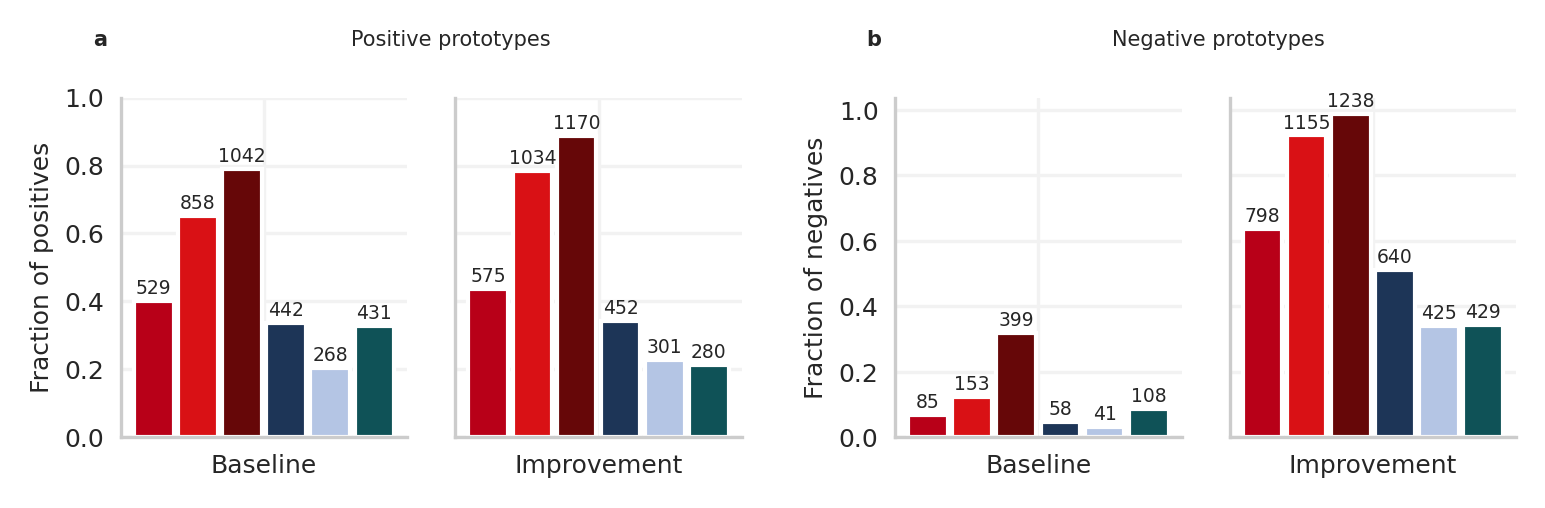

In [236]:
fig, (ax1, ax2, ax_dummy, ax3, ax4) = plt.subplots(
    nrows=1,
    ncols=5, 
    figsize=(6, 1.5),
    gridspec_kw={'width_ratios': [5, 5, 1, 5, 5]},
    dpi=300
)



width = 0.9  # the width of the bars
for ind, (means, color) in enumerate(zip(means_list, palette_models.values())):
    rects1 = ax1.bar(ind, means[0], width, color=color)
    autolabel(rects1, ax1, POS_COUNT)
    rects2 = ax2.bar(ind, means[1], width, color=color)
    autolabel(rects2, ax2, POS_COUNT)
    rects3 = ax3.bar(ind, means[2], width, color=color)
    autolabel(rects3, ax3, NEG_COUNT)
    rects4 = ax4.bar(ind, means[3], width, color=color)
    autolabel(rects4, ax4, NEG_COUNT)
        
ax1.sharey(ax2)
# ax2.axes.get_yaxis().set_visible(False)
ax2.tick_params(labelleft=False)
ax1.set_ylim(0,1)
ax3.sharey(ax4)
ax4.tick_params(labelleft=False)
# ax4.axes.get_yaxis().set_visible(False)



ax1.set_ylabel('Fraction of positives')
ax3.set_ylabel('Fraction of negatives')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticks([2.5])
ax1.set_xticklabels(['Baseline'])
ax2.set_xticklabels(['Improvement'])

ax3.set_xticklabels(['Baseline'])
ax4.set_xticklabels(['Improvement'])
ax_dummy.remove()


for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', pad=0.5)
    ax.yaxis.labelpad = 2.5

    
for i, (label, ax) in enumerate(
    zip(['a', 'b'], [ax1, ax3])
):
    ax.annotate(label, xy=(-0.05, 1.2), xycoords='axes fraction',
      fontweight='bold', va='top', ha='right')

ax1.annotate('Positive prototypes', xy=(1.5, 1.2), xycoords='axes fraction', va='top', ha='right')        
ax3.annotate('Negative prototypes', xy=(1.5, 1.2), xycoords='axes fraction', va='top', ha='right')        


        
# plt.tight_layout()
plt.show()
fig.savefig("../figures/Fig2_AnalogueGeneration.svg")


# Negative improvement - quality metrics

In [193]:
def extract_results(result_dict):
    prototype_amp = [peptide['amp'] for peptide in result_dict.values() if peptide['generated_sequences']]
    prototype_mic = [peptide['mic'] for peptide in result_dict.values() if peptide['generated_sequences']]

#     analogue_amp = [analogue['amp'] for entry in result_dict.values() \
#                     if entry['generated_sequences'] for analogue in entry['generated_sequences']]          
#     analogue_mic = [analogue['mic'] for entry in result_dict.values() \
#                     if entry['generated_sequences'] for analogue in entry['generated_sequences']] 
    
    analogue_amp = [max([analogue['amp'] for analogue in entry['generated_sequences']])
                for entry in result_dict.values() if entry['generated_sequences']]
    analogue_mic = [max([analogue['mic'] for analogue in entry['generated_sequences']])
                for entry in result_dict.values() if entry['generated_sequences']]
    
    return prototype_amp, prototype_mic, analogue_amp, analogue_mic


def extract_joker_results(result_df):
    prototype_amp = result_df.amp_prototype.to_list()
    prototype_mic = result_df.mic_prototype.to_list()

    analogue_amp = result_df.amp_analogue.to_list()
    analogue_mic = result_df.mic_analogue.to_list()
    
    return prototype_amp, prototype_mic, analogue_amp, analogue_mic

In [194]:
def get_data(results, mode):

    pos_amp = [peptide['amp'] for peptide in results[f'HydrAMP_pos_{mode}_1'].values()]
    pos_mic = [peptide['mic'] for peptide in results[f'HydrAMP_pos_{mode}_1'].values()]

    neg_amp = [peptide['amp'] for peptide in results[f'HydrAMP_neg_{mode}_1'].values()]
    neg_mic = [peptide['mic'] for peptide in results[f'HydrAMP_neg_{mode}_1'].values()]
        
    pos_data = [
        extract_results(results[f'HydrAMP_pos_{mode}_1']),
        extract_results(results[f'HydrAMP_pos_{mode}_2']),
        extract_results(results[f'HydrAMP_pos_{mode}_5']),
        extract_results(results[f'PepCVAE_pos_{mode}_1']),
        extract_results(results[f'Basic_pos_{mode}_1']),
        extract_joker_results(results[f'joker_pos_{mode}']),       
    ]


    neg_data = [
        extract_results(results[f'HydrAMP_neg_{mode}_1']),
        extract_results(results[f'HydrAMP_neg_{mode}_2']),
        extract_results(results[f'HydrAMP_neg_{mode}_5']),
        extract_results(results[f'PepCVAE_neg_{mode}_1']),
        extract_results(results[f'Basic_neg_{mode}_1']),
        extract_joker_results(results[f'joker_neg_{mode}']),         
    ]

    return pos_amp, pos_mic, neg_amp, neg_mic, pos_data, neg_data

In [238]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, data, k):
    quartile1, medians, quartile3 = np.array([np.percentile(data_, [25, 50, 75], axis=0) for data_ in data]).T
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, medians, marker='o', lw=0.5, edgecolors='k', color='white', s=15, zorder=3)
#     ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=0.5)
#     ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=0.5)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([3.5])
    ax.set_xticklabels([k])

In [245]:
def generate_classifier_distribution_plot(
    test_amp,
    test_mic,
    prototype_amp,
    prototype_mic,
    analogue_amp,
    analogue_mic,
):
    

    fig, (ax0a, ax1, ax2, ax0b, ax3, ax4) = plt.subplots(
        nrows=1, 
        ncols=6, 
        figsize=(6, 1.5),
        dpi=300,
        sharey=True,
        gridspec_kw={'width_ratios': [1, 6, 6, 1, 6, 6]}
    )

    ax0a_parts = ax0a.violinplot(
        dataset=test_amp,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        widths=0.85, 

    )

    ax0b_parts = ax0b.violinplot(
        dataset=test_mic,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        widths=0.85, 
    )
    
    set_axis_style(ax0a, [test_amp], 'AMP and MIC before')
    set_axis_style(ax0b, [test_mic], 'AMP and MIC before')


    for parts, color in zip([ax0a_parts, ax0b_parts], ['#ffd23f', '#540d6e']):
        for pc in parts['bodies']:
            pc.set_facecolor(color)
            pc.set_edgecolor('black')
            pc.set_linewidth(0.0)
            pc.set_alpha(1)   

    for ax in [ax0a, ax0b]:
        ax.set_xticks([1])
        ax.set_xticklabels(['Test data'])

    ax0a.set_ylabel('$P_{M_{AMP}}$')
    ax0b.set_ylabel('$P_{M_{MIC}}$')


    parts1 = ax1.violinplot(
        dataset=prototype_amp,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        widths=0.85, 
    )

    set_axis_style(ax1, prototype_amp, 'Prototypes')


    parts2 = ax2.violinplot(
        dataset=analogue_amp,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        widths=0.85, 
    )

    set_axis_style(ax2, analogue_amp, 'Analogues')



    parts3 = ax3.violinplot(
        dataset=prototype_mic,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        widths=0.85, 
    )

    set_axis_style(ax3, prototype_mic, 'Prototypes')

    parts4 = ax4.violinplot(
        dataset=analogue_mic,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        widths=0.85, 
    )
    set_axis_style(ax4, analogue_mic, 'Analogues')

    for ax in [ax1, ax2, ax3, ax4]:
        ax.spines['left'].set_visible(False)

    for parts in [parts1, parts2, parts3, parts4]:
        for pc, color in zip(parts['bodies'], palette_models.values()):
            pc.set_facecolor(color)
            pc.set_edgecolor('black')
            pc.set_linewidth(0.0)
            pc.set_alpha(1)
    
    for i, (label, ax) in enumerate(
    zip(['c', 'd'], [ax0a, ax0b])
    ):
        ax.annotate(label, xy=(-0.05, 1.2), xycoords='axes fraction',
          fontweight='bold', va='top', ha='right')


#     fig.tight_layout()
    return fig

# fig.savefig("../figures/Fig2_FGH.svg")


In [246]:
def plot_classifier_distribution(results, mode):
    
    pos_amp, pos_mic, neg_amp, neg_mic, pos_data, neg_data = get_data(results, mode)

    neg_prototype_amp = [x[0] for x in neg_data]
    neg_prototype_mic = [x[1] for x in neg_data]
    neg_analogue_amp = [x[2] for x in neg_data]
    neg_analogue_mic = [x[3] for x in neg_data]
    neg_test_amp = neg_amp
    neg_test_mic = neg_mic
    
    fig = generate_classifier_distribution_plot(
        neg_test_amp,
        neg_test_mic,
        neg_prototype_amp,
        neg_prototype_mic,
        neg_analogue_amp,
        neg_analogue_mic,

    )
    
    plt.show()
    return fig

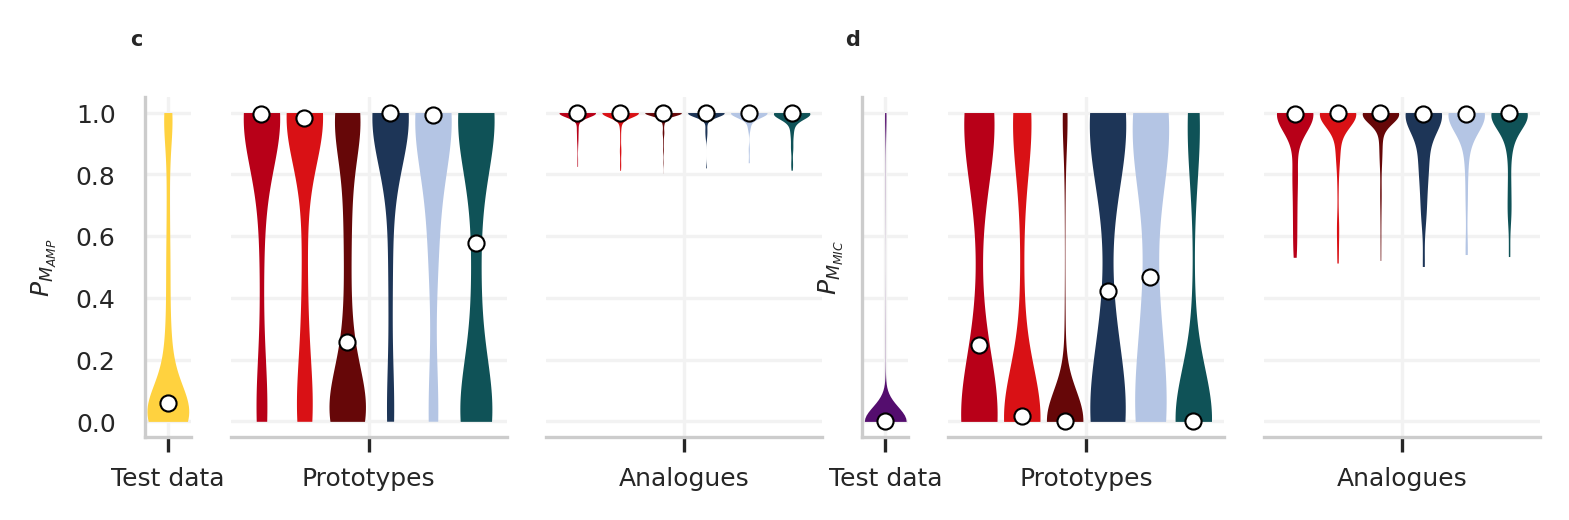

In [247]:
fig = plot_classifier_distribution(results, 'discovery')


fig.savefig("../figures/Fig2_Improvement.svg")


# Edit distance

In [199]:
pex_temp_camel = load(f'../results/PexTempCamel_2.joblib')

In [200]:
no_analogues = [pex_temp_camel['no_analogues']['Pexiganan'], pex_temp_camel['no_analogues']['CAMEL']]
levenshtein = [pex_temp_camel['ld']['Pexiganan'], pex_temp_camel['ld']['CAMEL']]
temps = [1, 2, 5]

In [201]:
def autolabel(rects, ax):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(np.exp(h)),
                ha='center', va='bottom')

width = 0.75
boxprops = dict(linewidth=0.5, color='black')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')
whiskerprops = dict(linewidth=0.5)
capprops =dict(linewidth=0.5, color='black')
medianprops=dict(color='black')


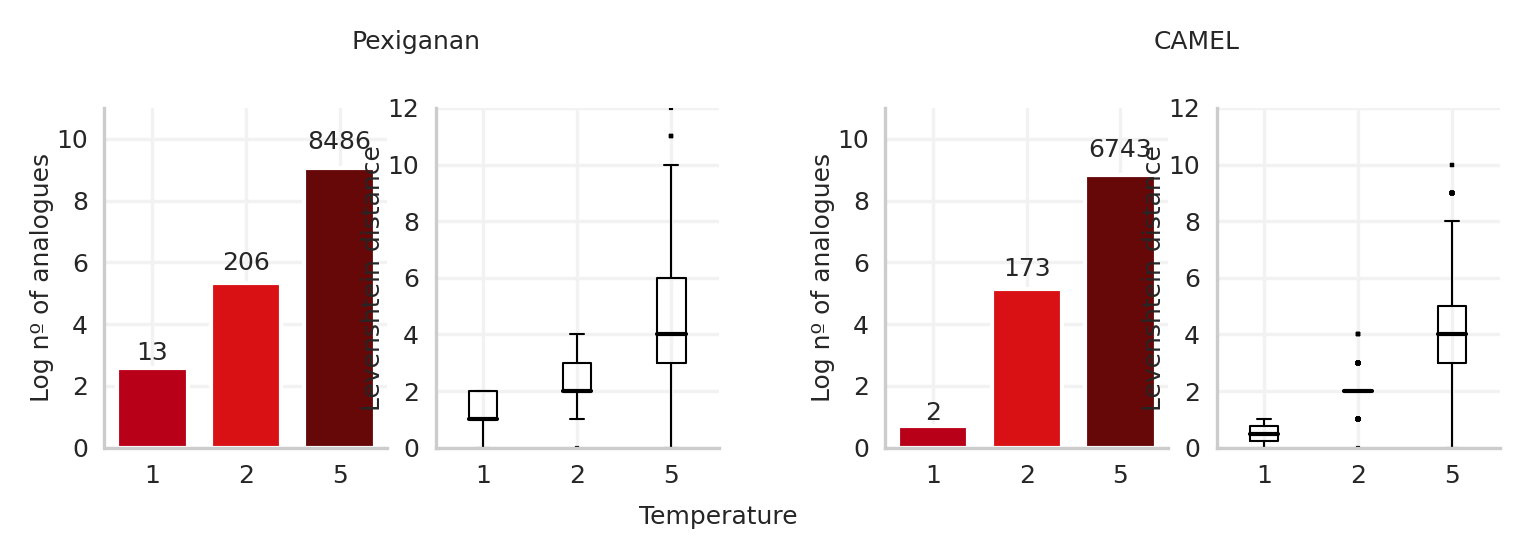

In [202]:
fig, (ax1, ax2, ax_dummy, ax3, ax4) = plt.subplots(
    nrows=1,
    ncols=5,
    figsize=(6, 1.5),
    dpi=300,
    gridspec_kw={'width_ratios': [2, 2, 0.5, 2, 2]}
)




rect = ax1.bar(
    ['1', '2', '5'],
    [np.log(x) if x != 0 else x for x in no_analogues[0]], 
    width=width, 
    color=[
        palette_models['HydrAMP τ=1'],
        palette_models['HydrAMP τ=2'],
        palette_models['HydrAMP τ=5']
    ]
)
autolabel(rect, ax=ax1)
ax1.set_title('Pexiganan', x=1.1, y=1.1)
ax2.boxplot(
    levenshtein[0],
    sym='+',
    flierprops=flierprops,
    boxprops=boxprops, 
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
)

                    
rect2 = ax3.bar(
    ['1', '2', '5'],
    [np.log(x) if x != 0 else x for x in no_analogues[1]], 
    width=width, 
    color=[
        palette_models['HydrAMP τ=1'],
        palette_models['HydrAMP τ=2'],
        palette_models['HydrAMP τ=5']
    ]
)

autolabel(rect2, ax=ax3)

ax3.set_title('CAMEL', x=1.1, y=1.1)
ax4.boxplot(levenshtein[1], 
            sym='+',
            flierprops=flierprops,
            boxprops=boxprops, 
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops,
           )

ax2.set_xticklabels(temps)
ax4.set_xticklabels(temps)

for ax in ax1, ax3:
    ax.set_ylabel('Log nº of analogues')

for ax in ax2, ax4:
    ax.set_ylabel('Levenshtein distance')
    
ax2.set_xlabel('Temperature', x=1)

ax1.set_ylim(0, 11)
ax3.set_ylim(0, 11)


ax2.set_ylim(0, 12)
ax4.set_ylim(0, 12)

for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', pad=0.5)
    ax.yaxis.labelpad = 0.5

ax_dummy.remove()
# ax2.set_yticklabels(range(0, 23, 3))
# ax4.set_yticklabels(range(0, 16, 3))

# fig.tight_layout()
plt.show()
fig.savefig("../figures/Fig2_EditDistance.svg")


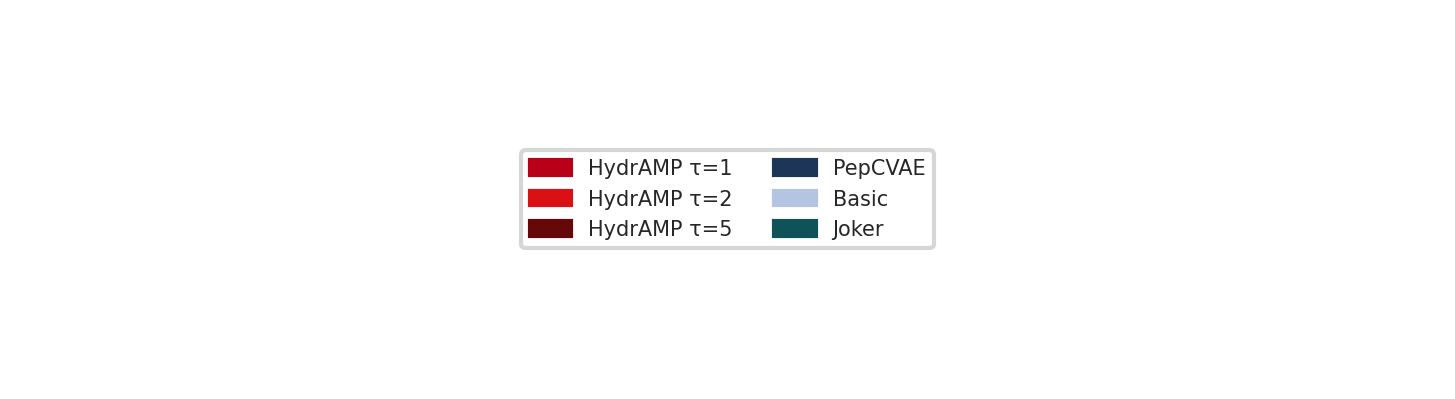

In [207]:

fig, ax1= plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6, 1.5),
    dpi=300,
)

patches = [mpatches.Patch(color=color, label=label) for label, color in palette_models.items()]
plt.legend(handles=patches, ncol=2,loc='center')

# fig.tight_layout()
plt.axis('off')
plt.show()
fig.savefig("../figures/Fig2_Legend.svg")
